#### About this repository:

The notebooks in this repository are meant to serve as comprehensive building blocks for establishing an algorithmic trading system. 
 
A number of sample trading strategies are included, along with methodologies to determine their robustness. Walk-Forward Analysis is one such well known technique, while Combinatorial Purged Cross Validation is a newer and more  rigorous methodology. Another useful and important concept is Meta Labelling, which predicts the probability of individual winning trades. All three techniques are utilized here to help improve the rigor of the systematic trading research process. 

Even though the methodologies presented in these notebooks can always be fine-tuned further, they are sophisticated enough to provide rigorous backtesting of any algorithmic trading strategy. After looking through this repository, one should gain an understanding of how algorithmic trading startegies are programmed and backtested. Identifying such strategies can simply be a matter of adapting algorithms found in research journals or trading websites; the aim of these notebooks is to determine a strategy's profitability and robustness. The final step of live trading a strategy should be merely trivial rewriting of a few lines of code in the Zipline version of the strategy. 


*Hoa Tuan Nguyen:* http://linkedin.com/in/hoatuannguyen/

## Pair Trading Strategy

This notebook explores pair trading for ETH and BTC. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import optuna

In [9]:
# Get historical data for BTC/USD and ETH/USD
BTC = pd.read_csv("/Users/nguyentuanhoa/Downloads/Crypto/zipline/data/btc_2019_july20_2020.csv",index_col=0,parse_dates=True)
ETH = pd.read_csv('/Users/nguyentuanhoa/Downloads/Crypto/zipline/data/eth_2019_july_2020.csv',index_col=0,parse_dates=True)
ETH.index = ETH.index.tz_localize(None)

df = pd.DataFrame({'BTC':BTC.open,'ETH':ETH.open})
df = df.dropna()   # in case BTC and ETH have different sizes

In [31]:
# helper function that returns p-value for the augmented Dickey–Fuller test for a time series
# of the spread between BTC and ETH
# also returns the hedge ratio used to calculate the spread

def coint_p_val(data, window):
    reg = sm.OLS(data.resample('1H').median().BTC.iloc[:window], 
                 data.resample('1H').median().ETH.iloc[:window]).fit()
    hedge_ratio = reg.params[0]
    
    spread = data.BTC - hedge_ratio * data.ETH
    coint = ts.adfuller(spread.resample('1H').median().iloc[:window])
    return coint[1], hedge_ratio

Run a quick Optuna optimization study to determine whether BTC and ETH are cointegrated during early 2019.

In [30]:
def objective(trial):
    window = int(trial.suggest_discrete_uniform('window', 240, 720, 48))
    return coint_p_val(df.loc['2019-03-01':'2019-05-01'].copy(), window)[0]

In [19]:
study = optuna.create_study(direction='minimize')

In [20]:
study.optimize(objective, n_trials=100)

[I 2020-08-08 16:44:08,936] Finished trial#0 with value: 0.3037944583899129 with parameters: {'window': 336.0}. Best is trial#0 with value: 0.3037944583899129.
[I 2020-08-08 16:44:09,140] Finished trial#1 with value: 0.059046066945004076 with parameters: {'window': 624.0}. Best is trial#1 with value: 0.059046066945004076.
[I 2020-08-08 16:44:09,312] Finished trial#2 with value: 0.26290963228481684 with parameters: {'window': 288.0}. Best is trial#1 with value: 0.059046066945004076.
[I 2020-08-08 16:44:09,428] Finished trial#3 with value: 0.059046066945004076 with parameters: {'window': 624.0}. Best is trial#1 with value: 0.059046066945004076.
[I 2020-08-08 16:44:09,541] Finished trial#4 with value: 0.12053430119560582 with parameters: {'window': 528.0}. Best is trial#1 with value: 0.059046066945004076.
[I 2020-08-08 16:44:09,650] Finished trial#5 with value: 0.21471056744996458 with parameters: {'window': 384.0}. Best is trial#1 with value: 0.059046066945004076.
[I 2020-08-08 16:44:09,

[I 2020-08-08 16:44:21,480] Finished trial#98 with value: 0.022354763389779344 with parameters: {'window': 720.0}. Best is trial#10 with value: 0.022354763389779344.
[I 2020-08-08 16:44:21,604] Finished trial#99 with value: 0.05731290125579822 with parameters: {'window': 672.0}. Best is trial#10 with value: 0.022354763389779344.


In [21]:
study.best_params

{'window': 720.0}

ETH and BTC in March 2019 show evidence of being cointegrated as the p-value for the ADF test is .022. 

In [32]:
coint_p_val(df.loc['2019-03-01':'2019-05-01'].copy(), 720)

(0.022354763389779344, 28.897214361108716)

#### Check for cointegration again for the two currencies in 2020

In [25]:
def objective2020(trial):
    window = int(trial.suggest_discrete_uniform('window', 240, 1440, 24))
    return coint_p_val(df.loc['2020-01-01':'2020-03-01'].copy(), window)

In [26]:
study2020 = optuna.create_study(direction='minimize')

In [27]:
study2020.optimize(objective2020, n_trials=100)

[I 2020-08-08 16:45:58,149] Finished trial#0 with value: 0.8775089578688201 with parameters: {'window': 840.0}. Best is trial#0 with value: 0.8775089578688201.
[I 2020-08-08 16:45:58,258] Finished trial#1 with value: 0.6928944867016887 with parameters: {'window': 456.0}. Best is trial#1 with value: 0.6928944867016887.
[I 2020-08-08 16:45:58,376] Finished trial#2 with value: 0.8775089578688201 with parameters: {'window': 840.0}. Best is trial#1 with value: 0.6928944867016887.
[I 2020-08-08 16:45:58,518] Finished trial#3 with value: 0.9952475064743266 with parameters: {'window': 888.0}. Best is trial#1 with value: 0.6928944867016887.
[I 2020-08-08 16:45:58,665] Finished trial#4 with value: 0.9938074284942344 with parameters: {'window': 984.0}. Best is trial#1 with value: 0.6928944867016887.
[I 2020-08-08 16:45:58,816] Finished trial#5 with value: 0.979427800214094 with parameters: {'window': 1296.0}. Best is trial#1 with value: 0.6928944867016887.
[I 2020-08-08 16:45:58,944] Finished tri

Looks like there is no more cointegration as of early 2020...

In [28]:
study2020.best_value

0.48793724417069284

#### Explore how this strategy would have perform while BTC and ETH were cointegrated, using Bollinger Bands to generate trading signals

In [33]:
hr = 28.583
s = 3000
f = 40
m = 2
spread = df.BTC - hr * df.ETH

slow_mva = spread.rolling(s).mean()
slow_std = spread.rolling(s).std()
fast_mva = spread.rolling(f).mean()

upper = slow_mva + m*slow_std
lower = slow_mva - m*slow_std

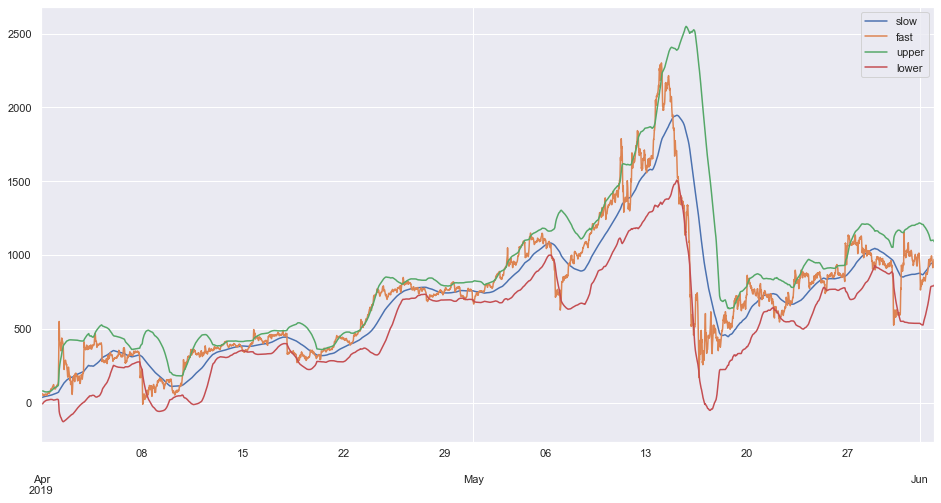

In [34]:
slow_mva.loc['2019-04-01':'2019-06-01'].plot(figsize=(16,8),label='slow')
fast_mva.loc['2019-04-01':'2019-06-01'].plot(label='fast')
upper.loc['2019-04-01':'2019-06-01'].plot(label='upper')
lower.loc['2019-04-01':'2019-06-01'].plot(label='lower')
plt.legend(loc='best')

In [40]:
def btc_eth_pair_trading(data, hedge_window, slow, fast, multiplier):    
    reg = sm.OLS(data.resample('1H').median().BTC.iloc[:hedge_window], 
                 data.resample('1H').median().ETH.iloc[:hedge_window]).fit()
    hedge_ratio = reg.params[0]
    
    spread = data.BTC - hedge_ratio * data.ETH
    
    slow_mva = spread.rolling(slow).mean()
    slow_std = spread.rolling(slow).std()
    fast_mva = spread.rolling(fast).mean()
    
    upper = slow_mva + multiplier*slow_std
    lower = slow_mva - multiplier*slow_std
    
    longs = np.where(fast_mva < lower, 1, 0)
    longs = np.where(fast_mva >= slow_mva, 0, longs)
    
    shorts = np.where(fast_mva > upper, -1, 0)
    shorts = np.where(fast_mva <= slow_mva, 0, shorts)
    
    positions = np.array(pd.Series(longs + shorts).shift(1).dropna())
    
    btc_d_rets = data.BTC.pct_change()
    eth_d_rets = (data.ETH * hedge_ratio).pct_change()
    
    daily_rets = btc_d_rets - eth_d_rets
    strat_rets = positions * daily_rets[1:]
    
    return strat_rets.sum()

In [37]:
def objective2(trial):
    slow = int(trial.suggest_discrete_uniform('slow', 1440, 4320, 240))
    fast = int(trial.suggest_discrete_uniform('fast', 60, 240, 15))
    mult = trial.suggest_discrete_uniform('mult', 1.5, 2.5, .2)
    return btc_eth_pair_trading(df.loc['2019-03-01':'2019-06-30'].copy(), 720, slow, fast, mult)

In [41]:
study2 = optuna.create_study(direction='maximize')

In [43]:
study2.optimize(objective2, n_trials=80)

[I 2020-08-08 17:37:38,467] Finished trial#80 with value: 0.04884513805804014 with parameters: {'slow': 2880.0, 'fast': 180.0, 'mult': 2.3}. Best is trial#59 with value: 0.24061132691112286.
[I 2020-08-08 17:37:38,655] Finished trial#81 with value: 0.23270873005246773 with parameters: {'slow': 3360.0, 'fast': 165.0, 'mult': 2.3}. Best is trial#59 with value: 0.24061132691112286.
[I 2020-08-08 17:37:38,848] Finished trial#82 with value: 0.23270873005246773 with parameters: {'slow': 3360.0, 'fast': 165.0, 'mult': 2.3}. Best is trial#59 with value: 0.24061132691112286.
[I 2020-08-08 17:37:39,066] Finished trial#83 with value: 0.18138426458991874 with parameters: {'slow': 3120.0, 'fast': 150.0, 'mult': 2.3}. Best is trial#59 with value: 0.24061132691112286.
[I 2020-08-08 17:37:39,251] Finished trial#84 with value: 0.23436280997996028 with parameters: {'slow': 3360.0, 'fast': 120.0, 'mult': 2.3}. Best is trial#59 with value: 0.24061132691112286.
[I 2020-08-08 17:37:39,440] Finished trial#85

In [44]:
study2.best_params

{'slow': 3120.0, 'fast': 165.0, 'mult': 2.3}

Zipline backtest cannot replicate anywhere near this positive return. Even though the strategy function has the advantage of speed by being vectorized, the mismatch with Zipline result means this function is not fit for further analysis. 

The strategy function can be easily rewritten to more closely match Zipline backtest. However, as there is no evidence of cointegration between BTC and ETH in the current market, there is little merit in pursuing this further. 

In [45]:
study2.best_value

0.24061132691112286